#Exoplanets Hunting with Machine Learning

 An exoplanet is any planet beyond our solar system. They are detected by astronomers by observing the intensity of their parent starts.

 Exoplanetsare made up of elements similar to those of the planets in our solar system, but their mixes of those elements may differ.

 Exoplanets come in a wide variety pf sizes, from gas giants larger than jupiter to small, rocky planets about as big around as Earth ot Mars.



**History**

` 1. Early claims to have detected exoplanets were made in the 19th century, notably by William Jacob.`

`2. In 1855, William saw deviations in the orrbits within the nearby 70 ophiuchi binary start system.`

`3. The first time we actually detected an exoplanet was in 1917 NASA's JPL but wasn't confirmed.`

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahoorshams","key":"2b5ec3a9e9700362b646e3b095c12b8d"}'}

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("keplersmachines/kepler-labelled-time-series-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/kepler-labelled-time-series-data


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [8]:
import os

path = "/root/.cache/kagglehub/datasets/keplersmachines/kepler-labelled-time-series-data/versions/3"
path2 = "/kaggle/input/kepler-labelled-time-series-data"

# List all files and directories
for root, dirs, files in os.walk(path2):
    for file in files:
        print(os.path.join(root, file))


/kaggle/input/kepler-labelled-time-series-data/exoTest.csv
/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv


In [9]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/keplersmachines/kepler-labelled-time-series-data/versions/3"
dataset_path2 = "/kaggle/input/kepler-labelled-time-series-data"


for file in os.listdir(dataset_path2):
    print(file)


exoTest.csv
exoTrain.csv


In [12]:
import pandas as pd

train_path = os.path.join(dataset_path2, "exoTrain.csv")
train_df = pd.read_csv(train_path)

print(train_df.head())

   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42       5.08  

In [14]:
# shape of train dataframe
train_df.shape

(5087, 3198)

>We can undersatand this data based on the transit method for detecting Exoplanets.

>There are total of 5087 starts in the data.

>For each star, we have 3197 flux values at different time intervals.

>These flux values are used to plot the light curves we saw eaelier to detect if a star has exoplanest(s) orbitting it.

##Check For Missing Values

In [16]:
# Display the rows with null calues in df
train_df[train_df.isnull().any(axis = 1)]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


there are **no missing values**! We can also cisualize it through heatmap.

<Axes: >

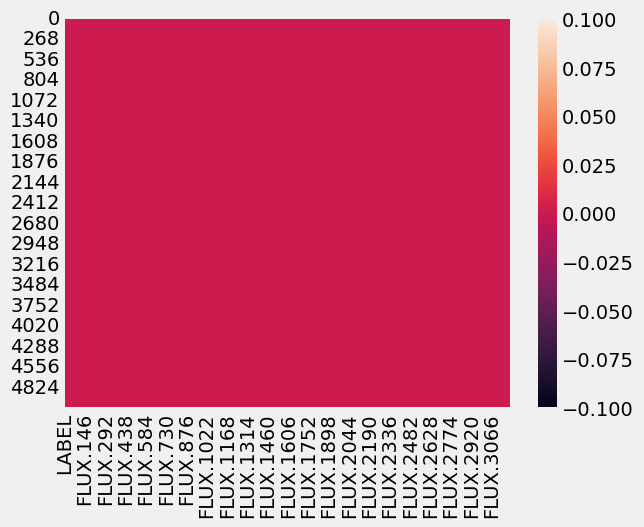

In [19]:
sns.heatmap(train_df.isnull())

>The horizontal dashes in this plot would indicate the presence of missing values in respective column.

>As there aren't any of such dashes seen we can coclude that there are no missing values in this data.

## Decoding labels in the data

In [22]:
# Check how many labels are present in train df
train_df['LABEL'].unique()

array([2, 1])

In [24]:
# Exctract the index for the starts labelled as 2
list(train_df[train_df['LABEL'] == 2].index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

>There are total of two classes; one is for stars with exoplanets and other for stars without exoplanets.

>Very few index for 2 indicates that this class must belong to stars with exoplanets.

>We can also visualise this using countplot.

